In [4]:
import matplotlib.pyplot as plt
from random import shuffle
import numpy as np
from PIL import Image, ImageOps
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# CONFIGURATIONS
IMAGE_SIZE = 224
IMAGE_DIM = (224, 224)
TEST = 'test'
DIR_TRAIN_BLAST = 'train/blast'
DIR_TRAIN_NORMAL = 'train/normal'

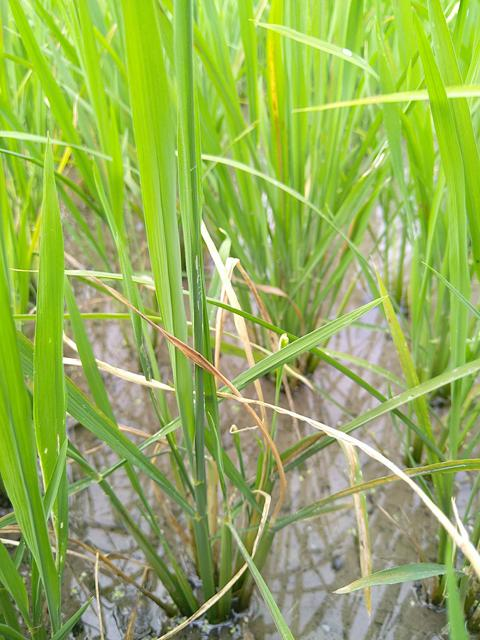

In [16]:
Image.open(DIR_TRAIN_BLAST+'/100050.jpg')

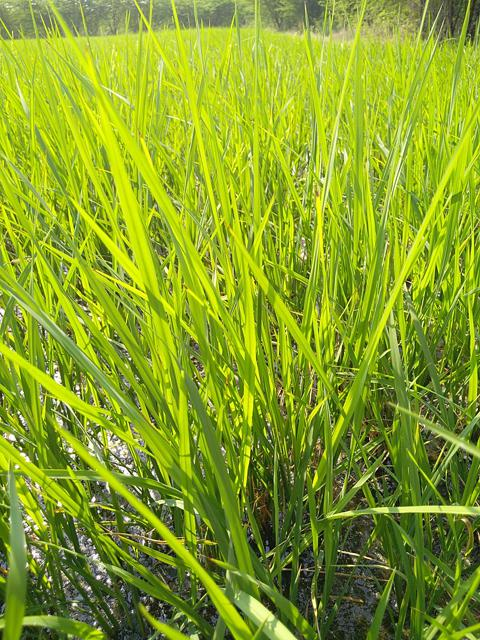

In [17]:
Image.open(DIR_TRAIN_NORMAL+'/100053.jpg')

#### No need to flatten grayscale image as they are 2d

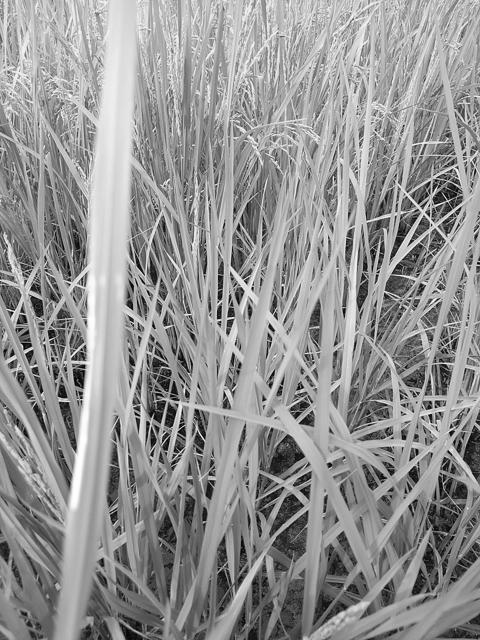

In [49]:
# basic changes
normal = Image.open('test/200001.jpg')
ImageOps.grayscale(normal)

In [42]:
normal = Image.open('test/200001.jpg')
normal = normal.resize((4, 4))
normal = ImageOps.grayscale(normal)
normal

In [43]:
normal_array_gray = np.array(normal)
normal_array_gray

array([[183, 175, 174, 168],
       [152, 154, 155, 141],
       [149, 144, 149, 137],
       [134, 115, 116, 121]], dtype=uint8)

In [51]:
normal_array_gray.flatten()

array([183, 175, 174, 168, 152, 154, 155, 141, 149, 144, 149, 137, 134,
       115, 116, 121], dtype=uint8)

In [46]:
normal = Image.open('test/200001.jpg')
normal = normal.resize((4, 4))
normal

In [47]:
normal_array_colored = np.array(normal)
normal_array_colored

array([[[183, 201,  90],
        [172, 195,  84],
        [169, 194,  81],
        [161, 188,  82]],

       [[149, 168,  76],
        [148, 171,  80],
        [150, 173,  79],
        [136, 155,  80]],

       [[144, 166,  75],
        [138, 159,  79],
        [142, 164,  88],
        [131, 151,  83]],

       [[124, 155,  56],
        [105, 132,  57],
        [108, 129,  68],
        [111, 136,  69]]], dtype=uint8)

#### Flattening color image

In [50]:
normal_array_colored.flatten()

array([183, 201,  90, 172, 195,  84, 169, 194,  81, 161, 188,  82, 149,
       168,  76, 148, 171,  80, 150, 173,  79, 136, 155,  80, 144, 166,
        75, 138, 159,  79, 142, 164,  88, 131, 151,  83, 124, 155,  56,
       105, 132,  57, 108, 129,  68, 111, 136,  69], dtype=uint8)

## Labeling

In [15]:
import os
categories = os.listdir('train')
train = []
for category in categories:
    imgs = os.listdir(os.path.join('train',category))
    for img in imgs:
        imgx = Image.open(os.path.join('train', category, img))
        imgx = np.array(imgx).flatten()
        train.append([imgx, categories.index(category)])
train
    

[[array([181, 185, 124, ...,  52,  73,  14], dtype=uint8), 0],
 [array([116, 162,  14, ...,  98, 133,   5], dtype=uint8), 0],
 [array([217, 220, 213, ...,  21,  69,   0], dtype=uint8), 0],
 [array([160, 200,  75, ...,  90, 126,  54], dtype=uint8), 0],
 [array([112, 144,  21, ..., 149, 180,  77], dtype=uint8), 0],
 [array([180, 222,  37, ..., 221, 212, 137], dtype=uint8), 0],
 [array([190, 201, 171, ...,  22,  36,  11], dtype=uint8), 0],
 [array([163, 208, 117, ...,  64,  65,  25], dtype=uint8), 0],
 [array([115, 152,  13, ...,  19,  21,   8], dtype=uint8), 0],
 [array([198, 211,   0, ...,  21,  19,   0], dtype=uint8), 0],
 [array([51, 98,  0, ..., 67, 98, 20], dtype=uint8), 0],
 [array([166, 198,  11, ...,  13,  35,   0], dtype=uint8), 0],
 [array([136, 167,  27, ..., 155, 185,  99], dtype=uint8), 0],
 [array([194, 161, 126, ...,   2,   7,   1], dtype=uint8), 0],
 [array([ 79, 124,   0, ..., 253, 211, 137], dtype=uint8), 0],
 [array([213, 215, 230, ...,  87,  94,  43], dtype=uint8), 0]

In [16]:
shuffle(train)
shuffle(train)
train

[[array([213, 234, 193, ...,  90,  79,  75], dtype=uint8), 0],
 [array([43, 75,  0, ...,  7, 23,  0], dtype=uint8), 0],
 [array([51, 95, 10, ..., 22, 28, 16], dtype=uint8), 0],
 [array([143, 188,   0, ..., 173, 169,  18], dtype=uint8), 0],
 [array([ 74, 128,  14, ...,  25,  54,   0], dtype=uint8), 0],
 [array([219, 234, 241, ...,   0,  23,   0], dtype=uint8), 1],
 [array([138, 141,  38, ...,  98, 140,   6], dtype=uint8), 1],
 [array([180, 212,  41, ...,  80, 118,   5], dtype=uint8), 1],
 [array([160, 200,  75, ...,  90, 126,  54], dtype=uint8), 0],
 [array([156, 186,  10, ...,  70, 114,   0], dtype=uint8), 0],
 [array([135, 173,   2, ...,  43,  37,  21], dtype=uint8), 0],
 [array([ 96, 122,   0, ..., 148, 187,   8], dtype=uint8), 0],
 [array([ 74, 107,  38, ...,  43,  76,  19], dtype=uint8), 0],
 [array([164, 208,  97, ...,  90,  94,  69], dtype=uint8), 0],
 [array([130, 132, 118, ..., 208, 230, 192], dtype=uint8), 0],
 [array([249, 251, 250, ...,  28,  67,   4], dtype=uint8), 0],
 [ar

In [18]:
feature = []
label = []
for feat, labl in train:
    feature.append(feat)
    label.append(labl)
X = feature
y = label

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
model.score(X_test, y_test)

0.8888888888888888

In [40]:
model.predict(X_test[:len(X_test)])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])